## Exercise 1

t-SNE with perplexity=5 took 13.34 seconds
t-SNE with perplexity=30 took 15.79 seconds
t-SNE with perplexity=50 took 19.61 seconds
t-SNE with perplexity=1000 took 74.31 seconds
UMAP with n_neighbors=5 took 4.88 seconds
UMAP with n_neighbors=15 took 7.83 seconds
UMAP with n_neighbors=50 took 9.04 seconds
UMAP with n_neighbors=1000 took 14.66 seconds


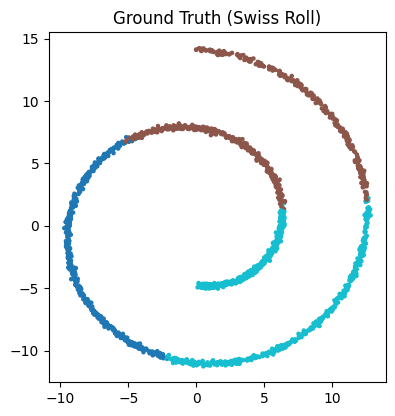

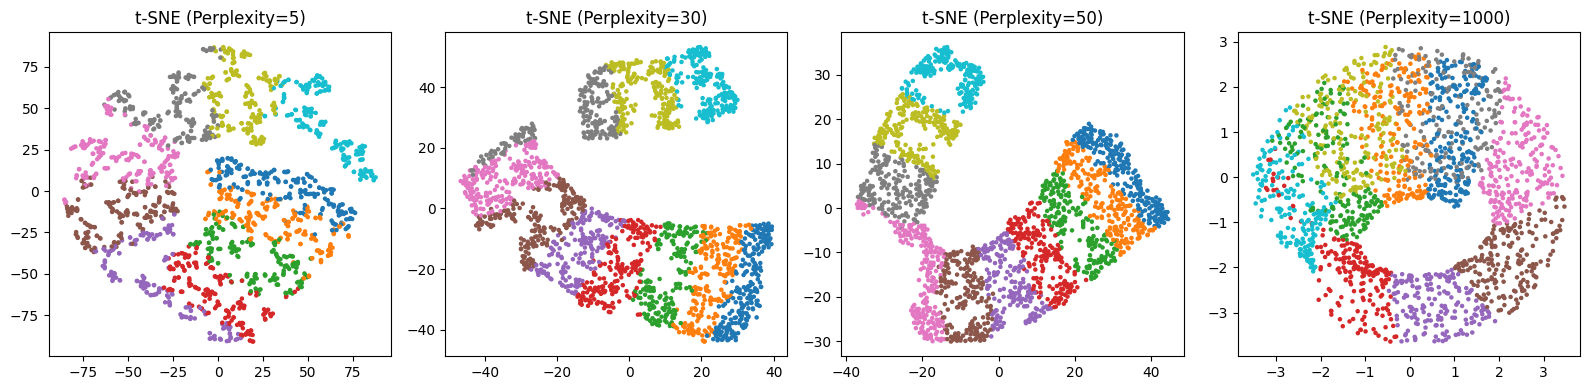

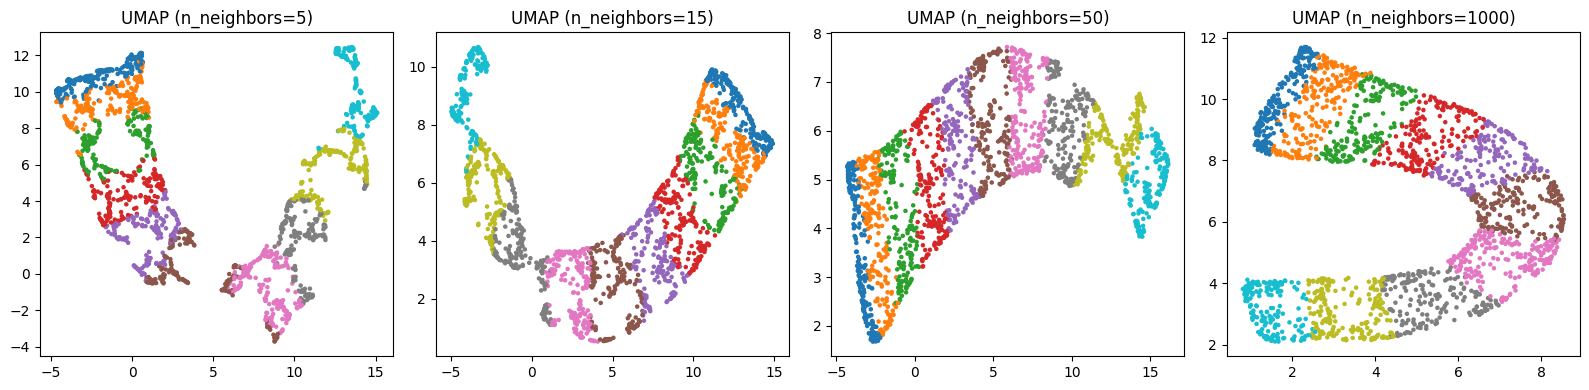

In [19]:
#!pip install umap-learn[plot]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import umap
import time
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Generate a synthetic dataset (Swiss Roll with noise)
np.random.seed(42)
data, colors = make_swiss_roll(n_samples=2000, noise=0.1)

# Add 10 extra random dimensions to make it complex
extra_dims = np.random.normal(size=(data.shape[0], 10))
data_high_dim = np.hstack([data, extra_dims])

# Assign clusters (for ground truth comparison)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
true_labels = kmeans.fit_predict(data_high_dim)  # Ground truth labels for validation

# Initialize hyperparameters for t-SNE and UMAP
tsne_perplexities = [5, 30, 50, 1000]
umap_n_neighbors = [5, 15, 50, 1000]
tsne_results = {}
umap_results = {}

# Apply t-SNE and UMAP with different hyperparameters, collect results and track runtime
for perplexity in tsne_perplexities:
    start_time = time.time()
    tsne_results[perplexity] = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(data_high_dim)
    end_time = time.time()
    print(f"t-SNE with perplexity={perplexity} took {end_time - start_time:.2f} seconds")

for n_neighbors in umap_n_neighbors:
    start_time = time.time()
    umap_results[n_neighbors] = umap.UMAP(n_neighbors=n_neighbors, random_state=42).fit_transform(data_high_dim)
    end_time = time.time()
    print(f"UMAP with n_neighbors={n_neighbors} took {end_time - start_time:.2f} seconds")


# Original Data (Ground Truth)
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.scatter(data[:, 0], data[:, 2], c=true_labels, cmap='tab10', s=5)
plt.title("Ground Truth (Swiss Roll)")

# Visualize t-SNE results
plt.figure(figsize=(16, 4))
for i, (param, embedding) in enumerate(tsne_results.items(), 1):
    plt.subplot(1, len(tsne_results), i)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, cmap='tab10', s=5)
    plt.title(f"t-SNE (Perplexity={param})")
plt.tight_layout()
plt.show()

# UMAP results
plt.figure(figsize=(16, 4))
for i, (param, embedding) in enumerate(umap_results.items(), 1):
    plt.subplot(1, len(umap_results), i)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, cmap='tab10', s=5)
    plt.title(f"UMAP (n_neighbors={param})")
plt.tight_layout()
plt.show()



##Differences between t-SNE and UMAP:
1. Core Idea:
- t-SNE is based on pairwise similarity probabilities using Gaussian kernels (local relationships).
- UMAP uses a graph-based approach and optimizes a low-dimensional manifold.
2. Hyperparameters:
- t-SNE uses Perplexity (influences local/global focus) and learning rate.
- UMAP uses n_neighbors (locality definition) and min_dist (density of points).
3. Runtime:
- t-SNE is slower for large datasets.
- UMAP is faster (linear time complexity with approximations).

##Advantages and Disadvantages:
####t-SNE
Advantages:
- Excellent for separating tightly clustered data.
- Handles non-linear relationships effectively.

Disadvantages:
- Hyperparameter tuning (e.g., perplexity) is non-intuitive.
- Computationally expensive.

####UMAP
Advantages:

- Preserves both local and global structures better.
- Faster and scales to larger datasets.
- Easier to interpret hyperparameters (n_neighbors and min_dist).

Disadvantages:
- Sensitive to n_neighbors; small values may overfit noise.
- Tends to form overly tight clusters for some settings.

##Faulty Correlations:

t-SNE: Varying perplexity can create different clustering patterns. For very low or high values, unrelated clusters might merge or split artificially.

UMAP: A very small n_neighbors might overfit the local structure, creating artificial separations. A very large value might overly smooth relationships, falsely merging distinct groups.

## Exercise 2

Running clustering on blob dataset...


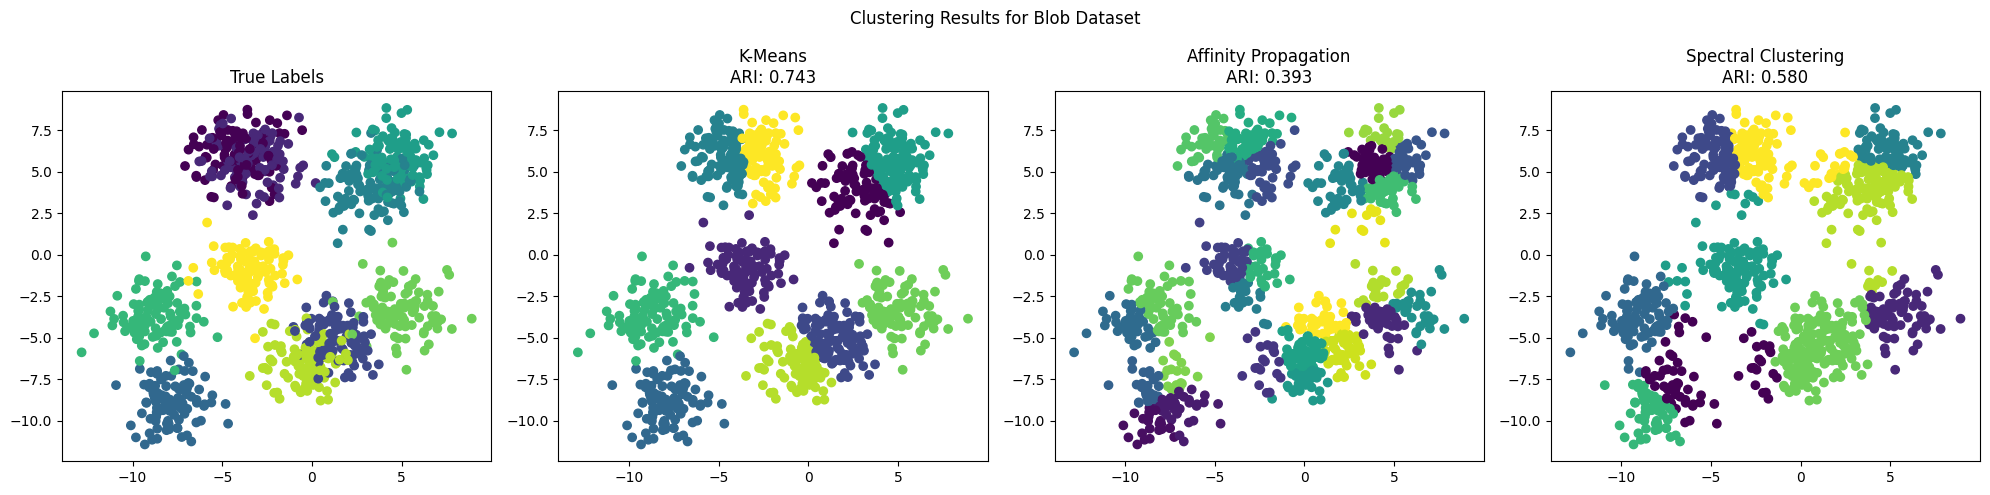


Evaluation metrics for Blob Dataset:
----------------------------------------
K-Means ARI: 0.743
Affinity Propagation ARI: 0.393
Spectral Clustering ARI: 0.580
Number of clusters found - AP: 27

Running clustering on checkerboard dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


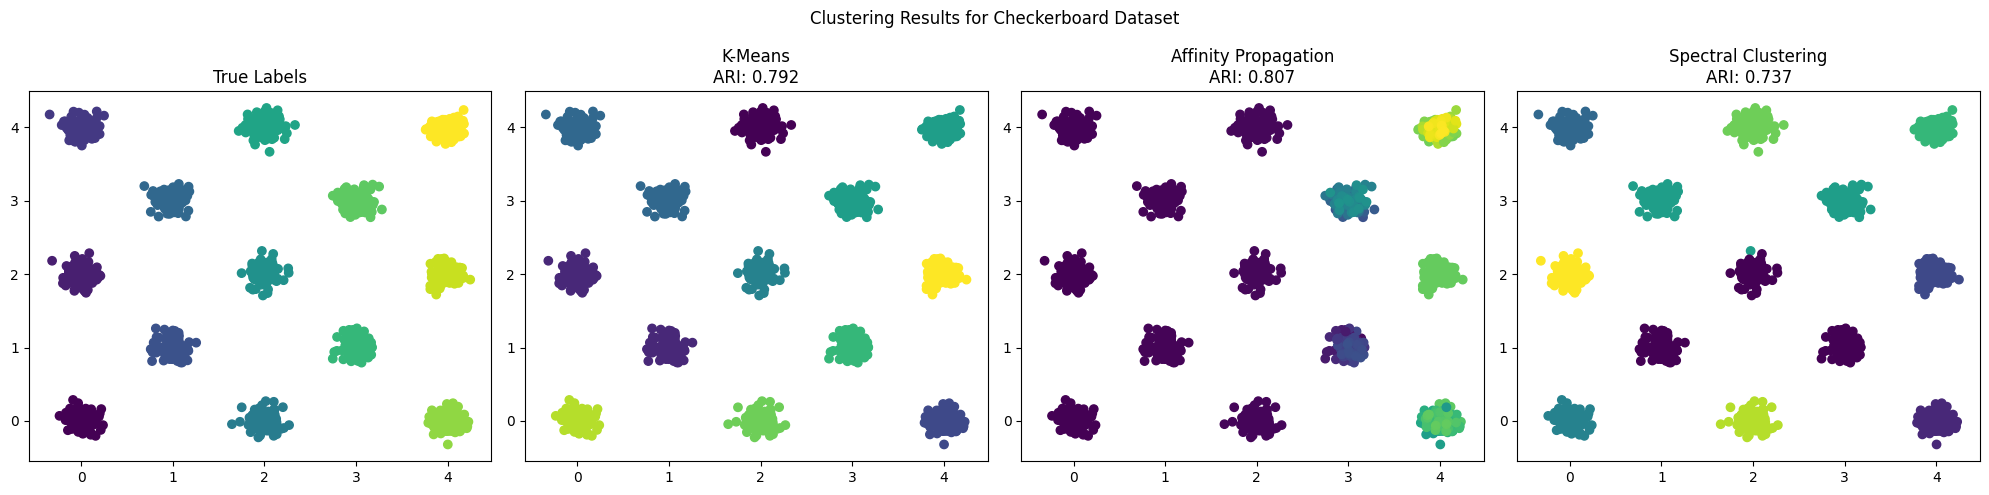


Evaluation metrics for Checkerboard Dataset:
----------------------------------------
K-Means ARI: 0.792
Affinity Propagation ARI: 0.807
Spectral Clustering ARI: 0.737
Number of clusters found - AP: 370


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering

n_clusters = 10

# Create the 2 datasets
X, y = make_blobs(n_samples=1000, centers=n_clusters, cluster_std=1.2, random_state=69)

def generate_checkerboard_data(n_samples, n_clusters, blocks, noise=0.1):
    samples_per_cluster = n_samples // n_clusters
    X = []
    y = []
    temp = 0
    for i in range(blocks):
        for j in range(blocks):
            if (i + j) % 2 == 0:
                x = np.random.normal(i * 1, noise, samples_per_cluster)
                y_coord = np.random.normal(j * 1, noise, samples_per_cluster)

                X.extend(list(zip(x, y_coord)))
                y.extend([temp] * samples_per_cluster)
                temp += 1
    return np.array(X), np.array(y)

X2, y2 = generate_checkerboard_data(1000, n_clusters, 5)

def transform_for_model(X, modelname):
    if modelname == "k-means":
        scaler = StandardScaler()
        X_transformed = scaler.fit_transform(X)
        return X_transformed
    elif modelname == "spectral" or modelname == "affinity":
        # Compute RBF kernel similarity matrix for both Spectral and Affinity
        gamma = 1.0 / (X.shape[1] * X.var())
        similarity_matrix = rbf_kernel(X, gamma=gamma)

        if modelname == "affinity":
            # Scale similarities for Affinity Propagation
            similarity_matrix = -50 * (1 - similarity_matrix)

        return similarity_matrix

# Function to run clustering on both datasets
def run_clustering(X, y, dataset_name):
    # Transform data for each algorithm
    X_kmeans = transform_for_model(X, "k-means")
    X_affinity = transform_for_model(X, "affinity")
    X_spectral = transform_for_model(X, "spectral")

    # Perform clustering
    # K-means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=69)
    kmeans_labels = kmeans.fit_predict(X_kmeans)

    # Affinity Propagation
    affin = AffinityPropagation(random_state=69, affinity='precomputed')
    affin_labels = affin.fit_predict(X_affinity)

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=69)
    spectral_labels = spectral.fit_predict(X_spectral)

    # Plot results
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'Clustering Results for {dataset_name}')

    # Original data with true labels
    ax[0].scatter(X[:, 0], X[:, 1], c=y)
    ax[0].set_title("True Labels")

    ax[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels)
    ax[1].set_title(f"K-Means\nARI: {adjusted_rand_score(y, kmeans_labels):.3f}")

    ax[2].scatter(X[:, 0], X[:, 1], c=affin_labels)
    ax[2].set_title(f"Affinity Propagation\nARI: {adjusted_rand_score(y, affin_labels):.3f}")

    ax[3].scatter(X[:, 0], X[:, 1], c=spectral_labels)
    ax[3].set_title(f"Spectral Clustering\nARI: {adjusted_rand_score(y, spectral_labels):.3f}")

    plt.tight_layout()
    plt.show()

    # Print evaluation metrics
    print(f"\nEvaluation metrics for {dataset_name}:")
    print("----------------------------------------")
    print(f"K-Means ARI: {adjusted_rand_score(y, kmeans_labels):.3f}")
    print(f"Affinity Propagation ARI: {adjusted_rand_score(y, affin_labels):.3f}")
    print(f"Spectral Clustering ARI: {adjusted_rand_score(y, spectral_labels):.3f}")
    print(f"Number of clusters found - AP: {len(np.unique(affin_labels))}")

# Run clustering on both datasets
print("Running clustering on blob dataset...")
run_clustering(X, y, "Blob Dataset")

print("\nRunning clustering on checkerboard dataset...")
run_clustering(X2, y2, "Checkerboard Dataset")